# Ecommerce Customer Churn Analysis and Prediction

# About this file
The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

# Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

reading the excel file 

In [2]:
ecdf=pd.read_excel("ML DATASET.xlsx", sheet_name='file')
ecdf.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001.0,1.0,4.0,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,50002.0,1.0,NaN,Phone,1.0,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,50003.0,1.0,NaN,Phone,1.0,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,50004.0,1.0,0.0,Phone,3.0,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,50005.0,1.0,0.0,Phone,1.0,12.0,CC,Male,NaN,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,130.0


Data info(), describe(), and columns

In [3]:
ecdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   float64
 1   Churn                        5630 non-null   float64
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   float64
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   float64
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   float64
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
ecdf.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In [5]:
ecdf.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [6]:
ecdf.shape

(5630, 20)

# finding out the null values in each columns

<AxesSubplot:>

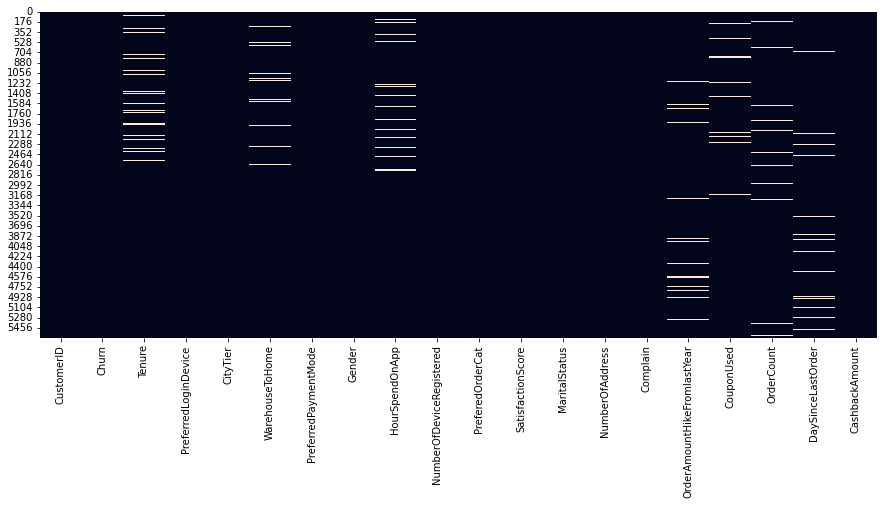

In [7]:
plt.figure(figsize=(15,6))
sns.heatmap(ecdf.isnull(), cbar=False)

# Null Values Treatment

treating the na values of 'HourSpendOnApp' by mean as 3

In [8]:
ecdf['HourSpendOnApp'].unique()

array([ 3.,  2., nan,  1.,  0.,  4.,  5.])

In [9]:
ecdf['HourSpendOnApp']=ecdf['HourSpendOnApp'].fillna(3)

filling null values of Tenure with avg value as 10

In [10]:
ecdf['Tenure'].unique()

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

In [11]:
ecdf['Tenure'].mean()

10.189899366380917

In [12]:
ecdf['Tenure']=ecdf['Tenure'].fillna(10)

filling null values of distance from warehouse to home using the interpole

In [13]:
ecdf['WarehouseToHome'].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  nan,  10.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  25.,  32.,  34.,   5.,  21., 126.,   7.,
        36., 127.])

In [14]:
# to interpolate the missing values
ecdf['WarehouseToHome']=ecdf['WarehouseToHome'].interpolate(method ='linear', limit_direction ='forward')

filling the missing values of 'OrderAmountHikeFromlastYear' to the previous ones

In [15]:
ecdf['OrderAmountHikeFromlastYear'].unique()

array([11., 15., 14., 23., 22., 16., 12., nan, 13., 17., 18., 24., 19.,
       20., 21., 25., 26.])

In [16]:
ecdf['OrderAmountHikeFromlastYear'].mean()

15.707921714818266

In [17]:
# filling a missing value with
# previous ones 
ecdf['OrderAmountHikeFromlastYear']=ecdf['OrderAmountHikeFromlastYear'].fillna(method ='pad')

filling the missing values of 'CouponUsed' with last valid observatios

In [18]:
ecdf['CouponUsed'].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11., nan,  7., 12., 10.,  5.,  3.,
       13., 15.,  8., 14., 16.])

In [19]:
ecdf['CouponUsed'].mean()

1.7510234462225531

In [20]:
# filling a missing value with
# last valid observations
ecdf['CouponUsed']=ecdf['CouponUsed'].fillna(method ='ffill')

treating the null values from OrderCount

In [21]:
ecdf['OrderCount'].unique()

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., nan, 11.,  5., 12., 10.,
        8., 13., 14., 16.])

In [22]:
ecdf['OrderCount'].mean()

3.0080044676098288

In [23]:
# filling a missing value with
# next valid observations
ecdf['OrderCount']=ecdf['OrderCount'].fillna(method ='bfill')

treating missing values of DaySinceLastOrder

In [24]:
ecdf['DaySinceLastOrder'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

In [25]:
ecdf['DaySinceLastOrder'].mean()

4.543490512868683

In [26]:
# filling a missing value with
# next valid observations
ecdf['DaySinceLastOrder']=ecdf['DaySinceLastOrder'].fillna(method ='bfill')

<AxesSubplot:>

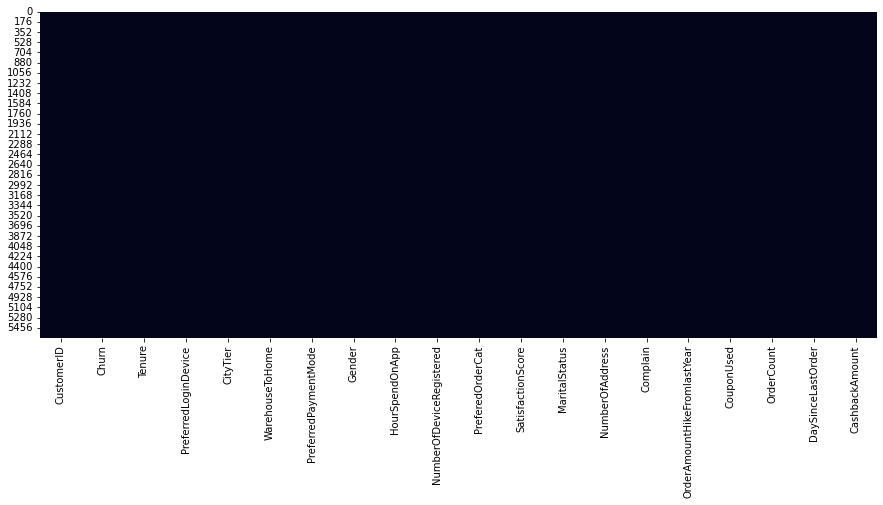

In [27]:
plt.figure(figsize=(15,6))
sns.heatmap(ecdf.isnull(), cbar=False)

# Percentage of Churn, CityTier and  HourSpendOnApp

In [28]:
(ecdf['Churn'].value_counts()/ecdf['Churn'].count())*100

0.0    83.161634
1.0    16.838366
Name: Churn, dtype: float64

# Data is highly imbalanced 83:17 (so the Accuracy will be Cursed)
So we need to do resampling (UpSampling or DownSamping) or smort in order to get the proper predictions

In [29]:
(ecdf['CityTier'].value_counts()/ecdf['Churn'].count())*100

1.0    65.115453
3.0    30.586146
2.0     4.298401
Name: CityTier, dtype: float64

In [30]:
ecdf['HourSpendOnApp'].value_counts()

3.0    2942
2.0    1471
4.0    1176
1.0      35
0.0       3
5.0       3
Name: HourSpendOnApp, dtype: int64

In [31]:
ecdf.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001.0,1.0,4.0,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,50002.0,1.0,10.0,Phone,1.0,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,50003.0,1.0,10.0,Phone,1.0,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,50004.0,1.0,0.0,Phone,3.0,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,50005.0,1.0,0.0,Phone,1.0,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,130.0


In [32]:
categorical_features=ecdf[['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']]
numerical_features=ecdf[['CustomerID', 'Churn', 'Tenure', 'CityTier','WarehouseToHome', 'HourSpendOnApp',
                        'NumberOfDeviceRegistered','SatisfactionScore', 'NumberOfAddress', 'Complain',
                        'OrderAmountHikeFromlastYear','CouponUsed', 'OrderCount','DaySinceLastOrder', 'CashbackAmount']]

# Grouping the Tenure using the bins of 12 Months

In [33]:
labels=['{0}-{1}'.format(i,i+11) for i in range(0,61,12)]
ecdf['tenure_group']=pd.cut(ecdf.Tenure,range(0,73,12),right=False,labels=labels)

In [34]:
ecdf['tenure_group'].value_counts()

0-11     3552
12-23    1574
24-35     500
48-59       2
60-71       2
36-47       0
Name: tenure_group, dtype: int64

In [35]:
ecdf['tenure_group'].count()

5630

# Groping WarehouseToHome distance

In [36]:
labels=['{0}-{1}'.format(i,i+11) for i in range(1,127,20)]
ecdf['w2h_distance_group']=pd.cut(ecdf.WarehouseToHome,range(1,150,20),right=False,labels=labels)

In [37]:
ecdf['WarehouseToHome'].unique()

array([  6.        ,   8.        ,  30.        ,  15.        ,
        12.        ,  22.        ,  11.        ,   9.        ,
        31.        ,  18.        ,  13.        ,  20.        ,
        29.        ,  28.        ,  26.        ,  14.        ,
        10.        ,  11.5       ,  27.        ,  23.5       ,
        17.        ,  23.        ,  16.        ,  33.        ,
        19.        ,  35.        ,  24.        ,  25.        ,
        28.5       ,  32.        ,   7.        ,  15.5       ,
        21.5       ,  21.        ,  34.        ,   5.        ,
        13.5       ,  22.5       ,  12.5       ,   9.5       ,
        15.33333333,  21.66666667,  34.5       ,  16.5       ,
        10.5       ,  17.5       ,  12.33333333,  10.66666667,
         7.5       ,  24.33333333,  17.66666667,   9.33333333,
        12.66666667,  19.5       ,  18.5       ,  20.5       ,
        24.5       ,  10.33333333,  11.66666667,   8.5       ,
        25.5       , 126.        ,  89.        ,  52.  

# Grouping NumberOfAddress 

In [38]:
labels=['{0}-{1}'.format(i,i+4) for i in range(1,22,5)]
ecdf['no_of_addrs_group']=pd.cut(ecdf.NumberOfAddress,range(1,29,5),right=False,labels=labels)

In [39]:
ecdf['NumberOfAddress'].unique()

array([ 9.,  7.,  6.,  8.,  3.,  2.,  4., 10.,  1.,  5., 19., 21., 11.,
       20., 22.])

# Grouping 'OrderAmountHikeFromlastYear'

In [40]:
'OrderAmountHikeFromlastYear'
labels=['{0}-{1}'.format(i,i+3) for i in range(1,26,4)]
ecdf['order_amount_hike_group']=pd.cut(ecdf.OrderAmountHikeFromlastYear,range(1,30,4),right=False,labels=labels)

In [41]:
ecdf['OrderAmountHikeFromlastYear'].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26.])

In [42]:
ecdf.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group,w2h_distance_group,no_of_addrs_group,order_amount_hike_group
0,50001.0,1.0,4.0,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,...,1.0,11.0,1.0,1.0,5.0,160.0,0-11,1-12,6-10,9-12
1,50002.0,1.0,10.0,Phone,1.0,8.0,UPI,Male,3.0,4.0,...,1.0,15.0,0.0,1.0,0.0,121.0,0-11,1-12,6-10,13-16
2,50003.0,1.0,10.0,Phone,1.0,30.0,Debit Card,Male,2.0,4.0,...,1.0,14.0,0.0,1.0,3.0,120.0,0-11,21-32,6-10,13-16
3,50004.0,1.0,0.0,Phone,3.0,15.0,Debit Card,Male,2.0,4.0,...,0.0,23.0,0.0,1.0,3.0,134.0,0-11,1-12,6-10,21-24
4,50005.0,1.0,0.0,Phone,1.0,12.0,CC,Male,3.0,3.0,...,0.0,11.0,1.0,1.0,3.0,130.0,0-11,1-12,1-5,9-12


Now dropping the CustomerID and Tenure Columns from the DataFrame

In [43]:
ecdf.drop(columns=['CustomerID','Tenure'],axis=1,inplace=True)
ecdf.head()

,Churn,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group,w2h_distance_group,no_of_addrs_group,order_amount_hike_group
0,1.0,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,...,1.0,11.0,1.0,1.0,5.0,160.0,0-11,1-12,6-10,9-12
1,1.0,Phone,1.0,8.0,UPI,Male,3.0,4.0,Mobile,3.0,...,1.0,15.0,0.0,1.0,0.0,121.0,0-11,1-12,6-10,13-16
2,1.0,Phone,1.0,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,...,1.0,14.0,0.0,1.0,3.0,120.0,0-11,21-32,6-10,13-16
3,1.0,Phone,3.0,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,...,0.0,23.0,0.0,1.0,3.0,134.0,0-11,1-12,6-10,21-24
4,1.0,Phone,1.0,12.0,CC,Male,3.0,3.0,Mobile,5.0,...,0.0,11.0,1.0,1.0,3.0,130.0,0-11,1-12,1-5,9-12


<AxesSubplot:>

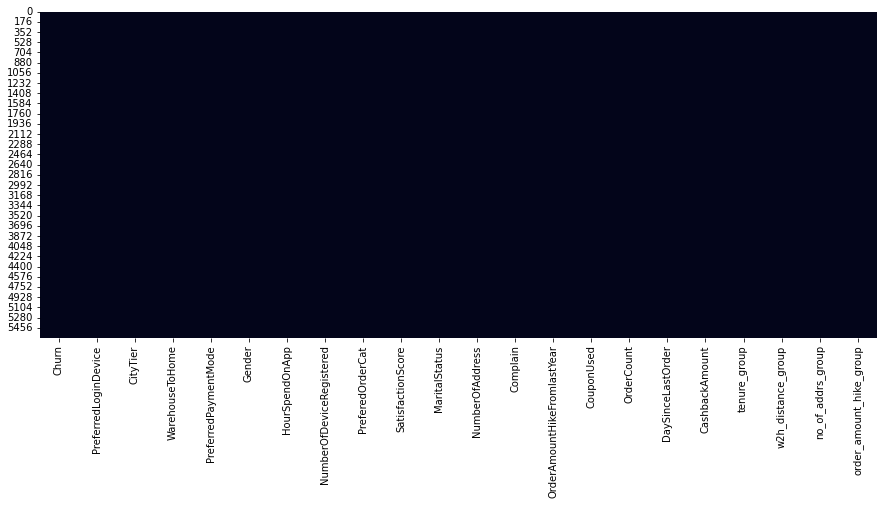

In [44]:
plt.figure(figsize=(15,6))
sns.heatmap(ecdf.isnull(), cbar=False)

In [45]:
# ecdf[ecdf['tenure_group'].isnull()][['Tenure','tenure_group']]

Now treating the null values in tenure_group as no_tenure

In [46]:
# labels1=['{0}-{1}'.format(i,i+1) for i in range(0,1,1)]
# # ecdf['tenure_group']=pd.cut(ecdf.Tenure,range(0,2,1),right=False,labels=labels) 
# labels2=['{0}-{1}'.format(i,i+11) for i in range(1,61,12)]
# ecdf['tenure_group']=pd.cut(ecdf.Tenure,range(0,73,12),right=False,labels=['labels1','labels2'])

In [47]:
# ecdf.drop(columns=['tenure_group1','tenure_group2'],axis=1,inplace=True)
ecdf.head()

,Churn,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group,w2h_distance_group,no_of_addrs_group,order_amount_hike_group
0,1.0,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,...,1.0,11.0,1.0,1.0,5.0,160.0,0-11,1-12,6-10,9-12
1,1.0,Phone,1.0,8.0,UPI,Male,3.0,4.0,Mobile,3.0,...,1.0,15.0,0.0,1.0,0.0,121.0,0-11,1-12,6-10,13-16
2,1.0,Phone,1.0,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,...,1.0,14.0,0.0,1.0,3.0,120.0,0-11,21-32,6-10,13-16
3,1.0,Phone,3.0,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,...,0.0,23.0,0.0,1.0,3.0,134.0,0-11,1-12,6-10,21-24
4,1.0,Phone,1.0,12.0,CC,Male,3.0,3.0,Mobile,5.0,...,0.0,11.0,1.0,1.0,3.0,130.0,0-11,1-12,1-5,9-12


In [48]:
ecdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Churn                        5630 non-null   float64 
 1   PreferredLoginDevice         5630 non-null   object  
 2   CityTier                     5630 non-null   float64 
 3   WarehouseToHome              5630 non-null   float64 
 4   PreferredPaymentMode         5630 non-null   object  
 5   Gender                       5630 non-null   object  
 6   HourSpendOnApp               5630 non-null   float64 
 7   NumberOfDeviceRegistered     5630 non-null   float64 
 8   PreferedOrderCat             5630 non-null   object  
 9   SatisfactionScore            5630 non-null   float64 
 10  MaritalStatus                5630 non-null   object  
 11  NumberOfAddress              5630 non-null   float64 
 12  Complain                     5630 non-null   float64 
 13  Ord

In [49]:
# ecdf['Tenure'].unique()

In [50]:
ecdf.columns

Index(['Churn', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'tenure_group',
       'w2h_distance_group', 'no_of_addrs_group', 'order_amount_hike_group'],
      dtype='object')

<AxesSubplot:>

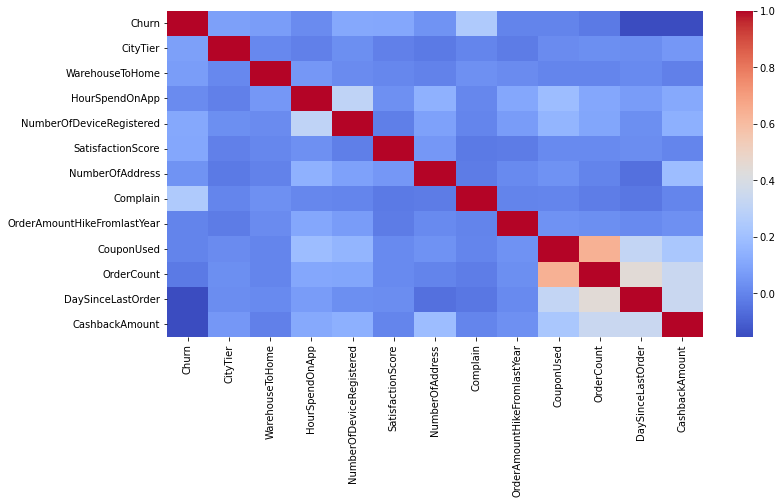

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(ecdf.corr(),cmap='coolwarm')

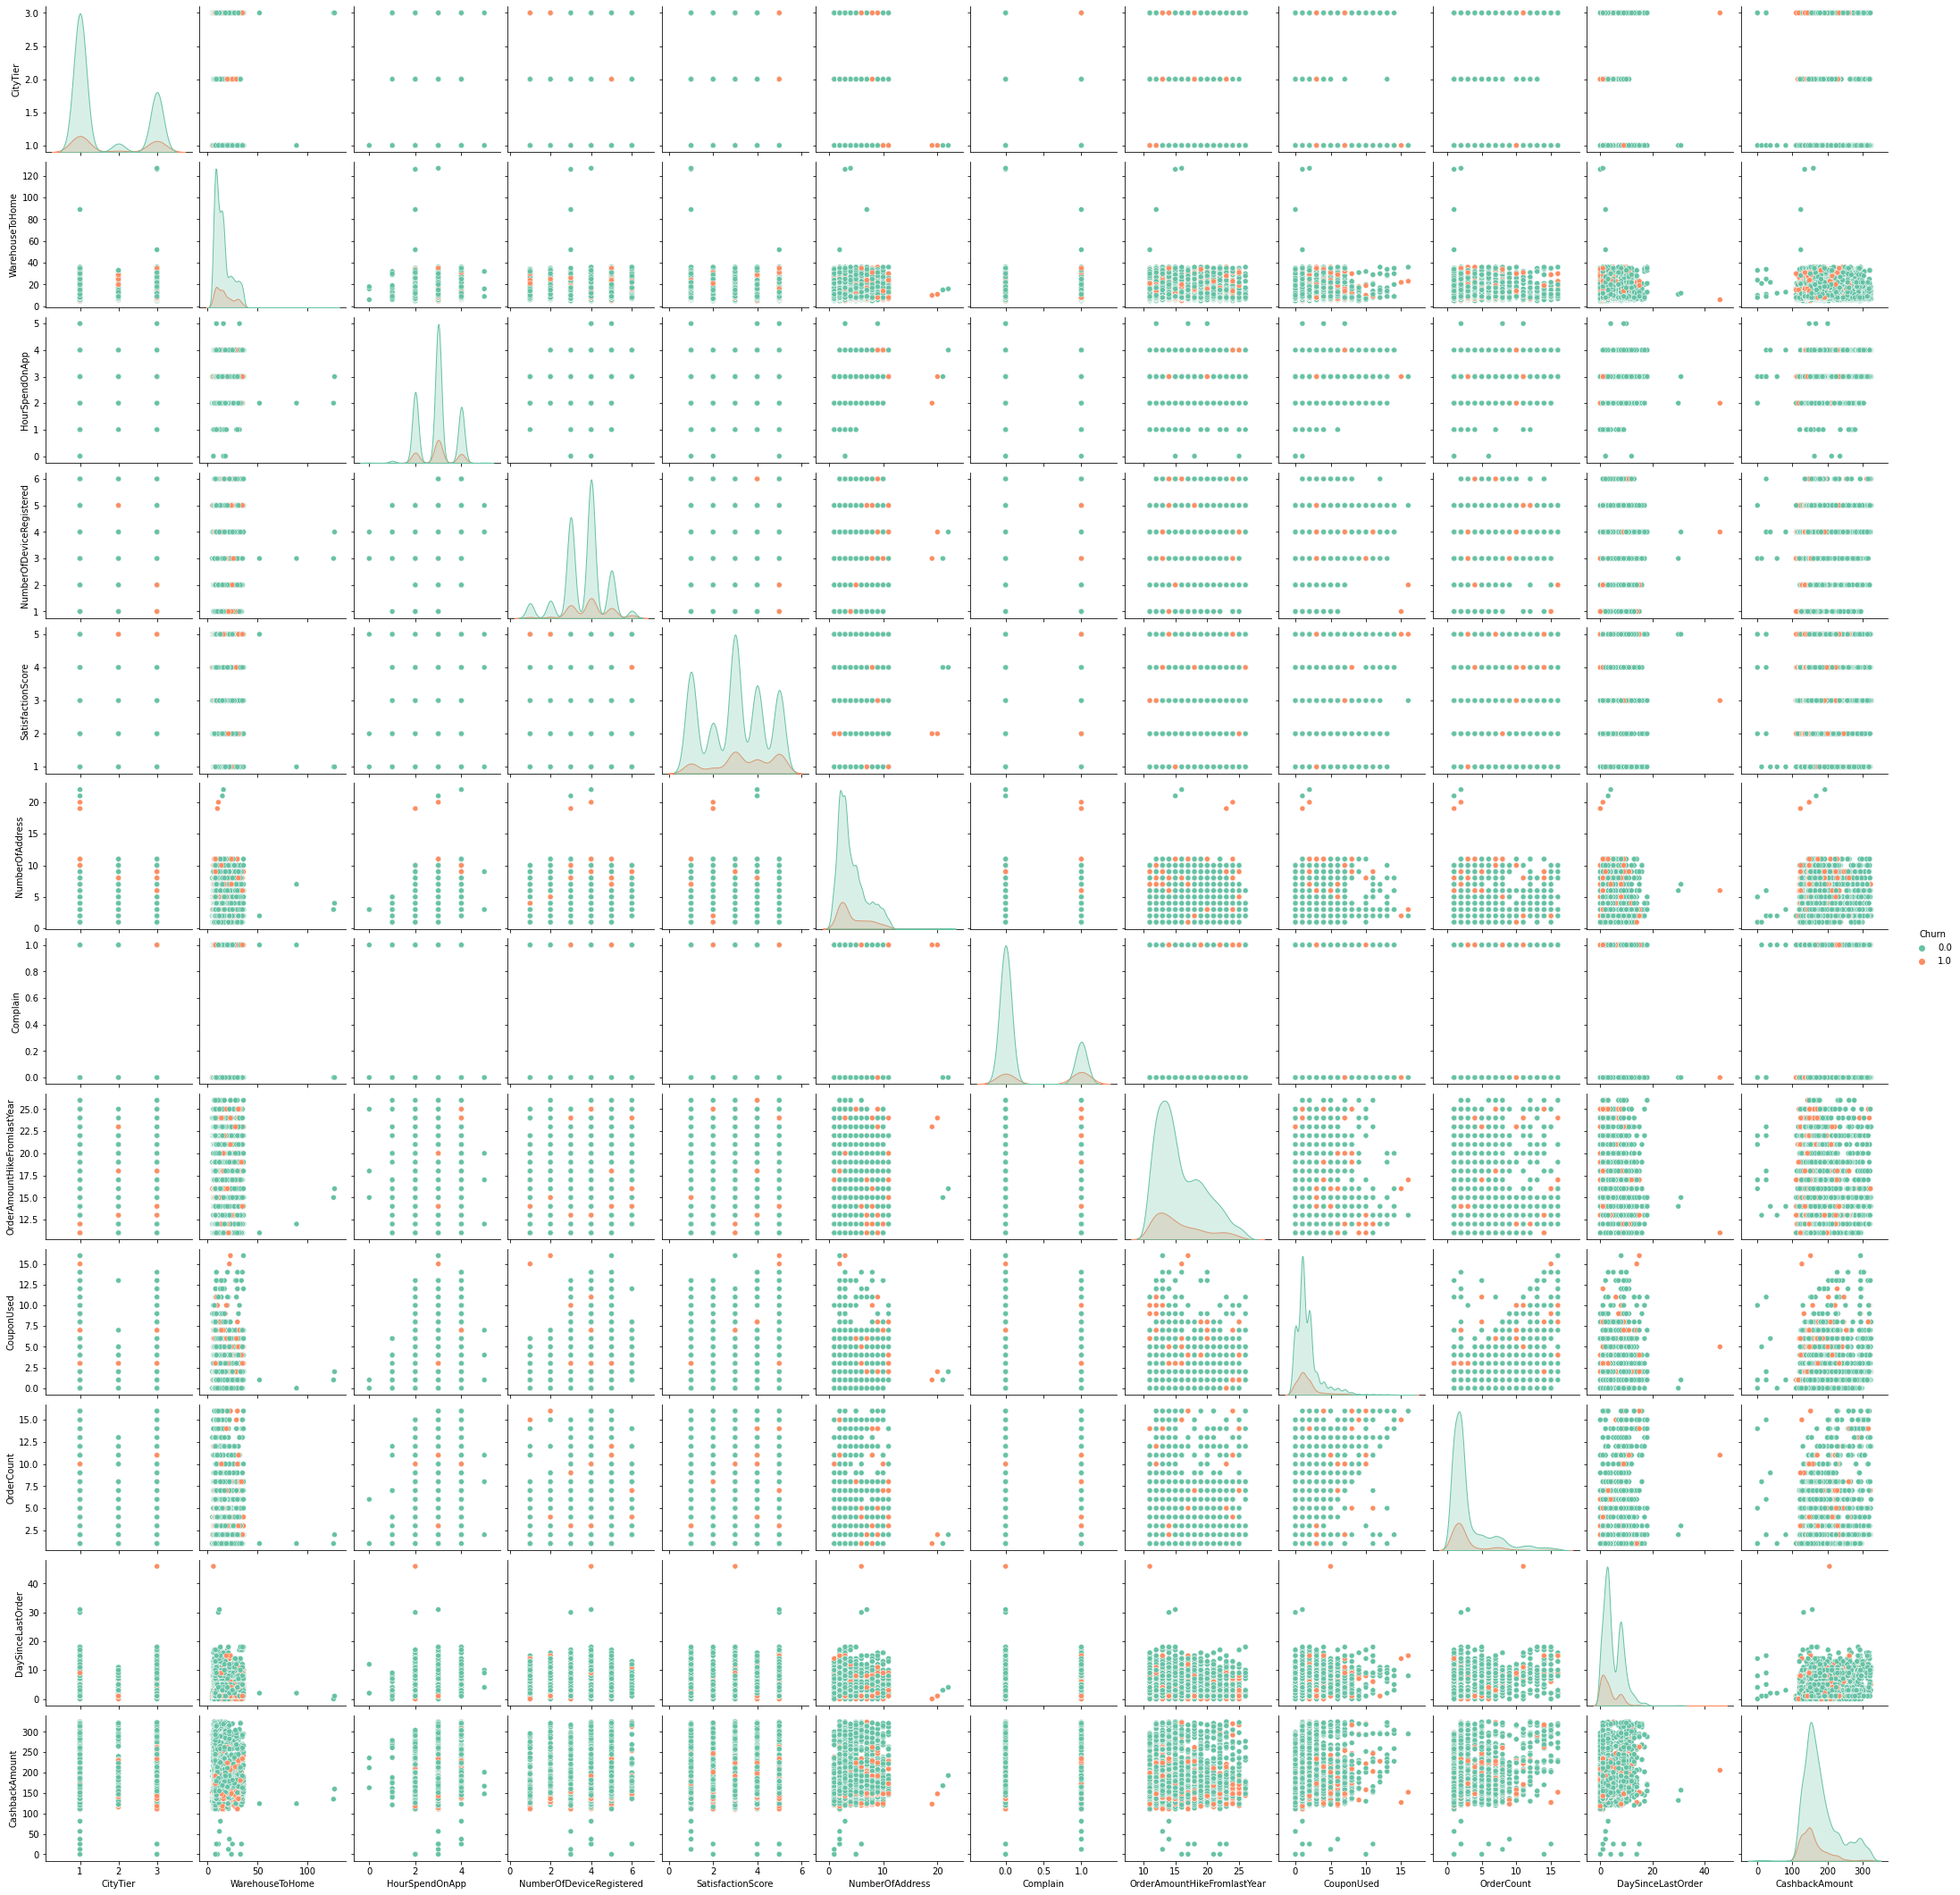

In [52]:
sns.pairplot(ecdf,hue='Churn',palette='Set2')

finding out the ration of churn

# EDA

UNIVARIATE Analysis

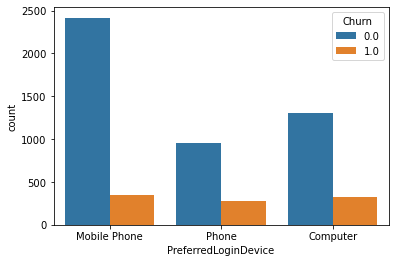

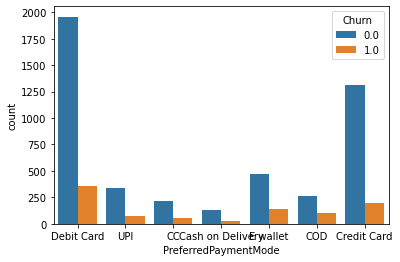

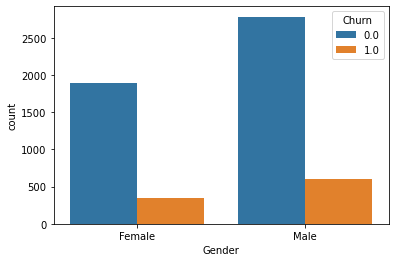

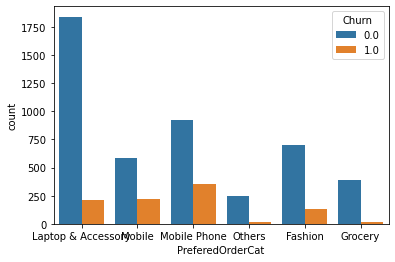

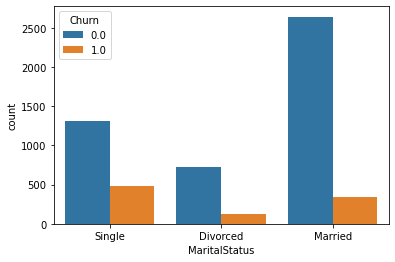

In [53]:
for i, predictor in enumerate(ecdf[['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat',
                                    'MaritalStatus']]):
    plt.figure(i)
    sns.countplot(data=ecdf, x=predictor, hue='Churn')

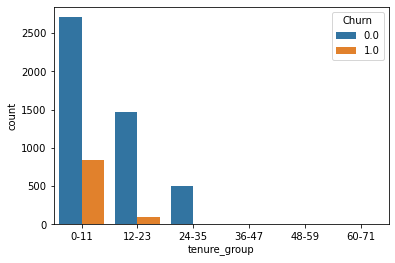

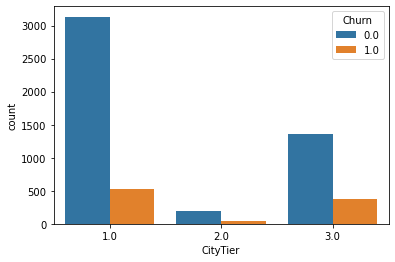

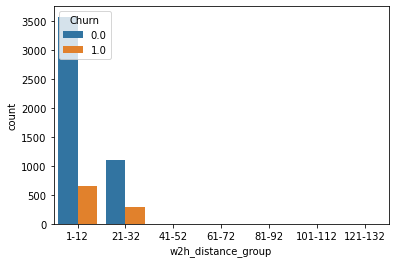

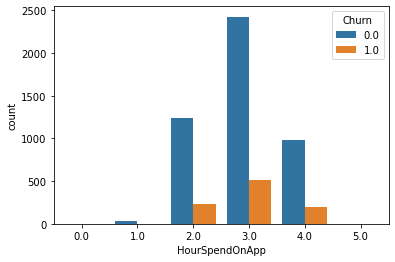

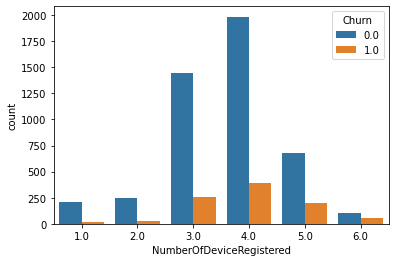

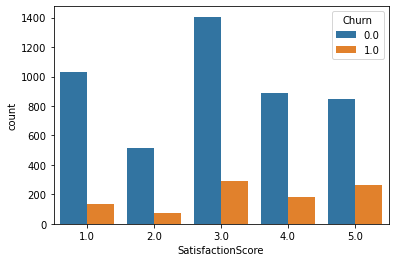

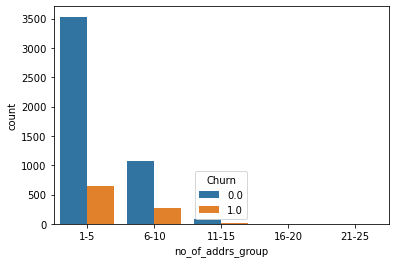

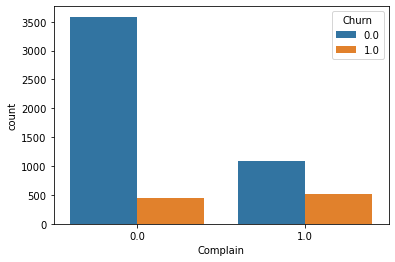

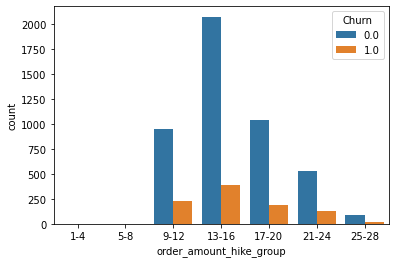

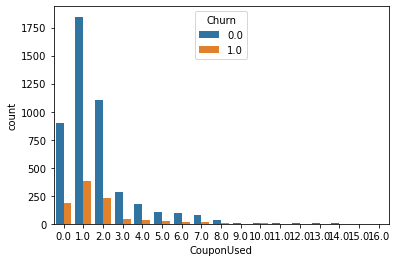

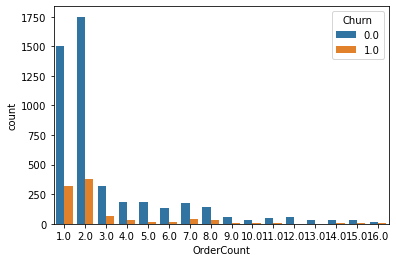

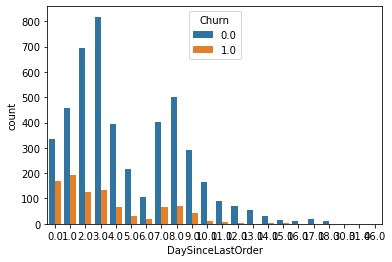

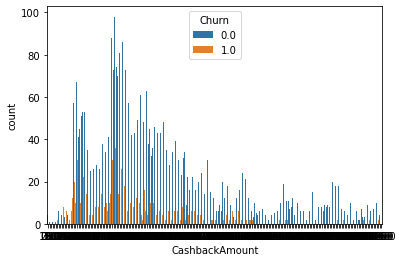

In [54]:
for i, predictor in enumerate(ecdf[['tenure_group', 'CityTier','w2h_distance_group', 'HourSpendOnApp',
                        'NumberOfDeviceRegistered','SatisfactionScore', 'no_of_addrs_group', 'Complain',
                        'order_amount_hike_group','CouponUsed', 'OrderCount','DaySinceLastOrder', 'CashbackAmount']]):
    plt.figure(i)
    sns.countplot(data=ecdf, x=predictor, hue='Churn')

# Getting Dummies

In [55]:
ecdf_dummies=pd.get_dummies(ecdf)
ecdf_dummies.head()

,Churn,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,no_of_addrs_group_11-15,no_of_addrs_group_16-20,no_of_addrs_group_21-25,order_amount_hike_group_1-4,order_amount_hike_group_5-8,order_amount_hike_group_9-12,order_amount_hike_group_13-16,order_amount_hike_group_17-20,order_amount_hike_group_21-24,order_amount_hike_group_25-28
0,1.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,1.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
ecdf_dummies.columns

Index(['Churn', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'tenure_group_0-11',
       'tenure_group_12-23',

<AxesSubplot:>

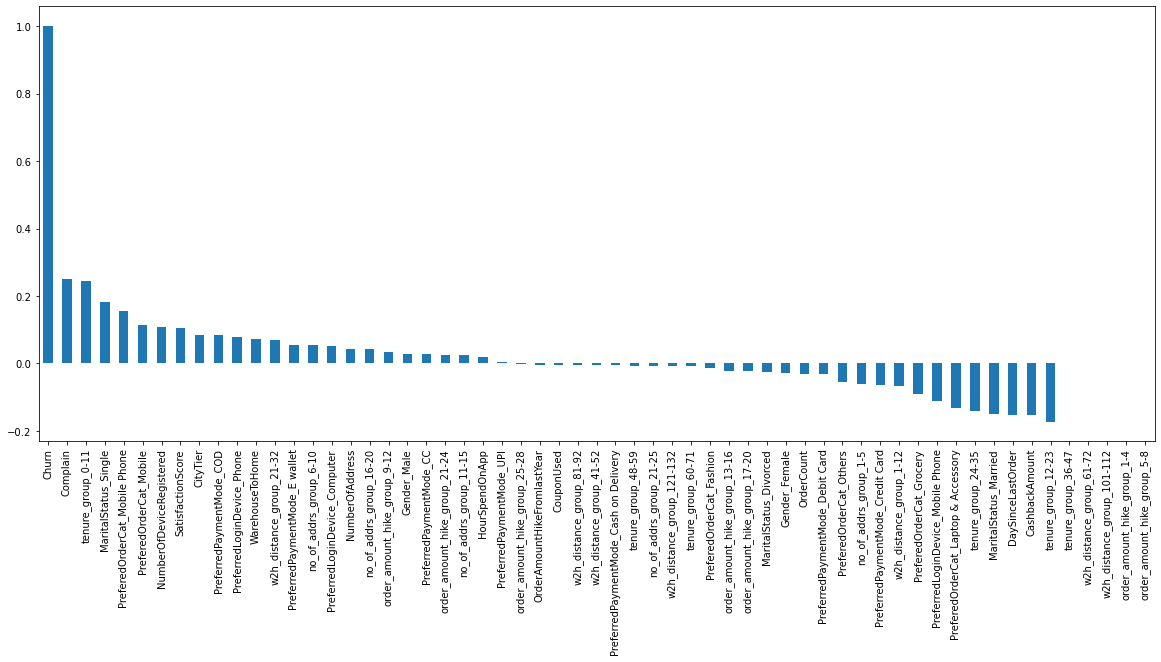

In [57]:
plt.figure(figsize=(20,8))
ecdf_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# Derived Insights

1. **High Churn** is seen in case of 
   **the complains** and 
   **tenure group 0-11** (which also includes people who are users (508) for less than a month)
   **Marital Status as Single & preferred order category Mobile Phone**
   
2. **Low Churn** is seen in case of 
   **subscription or tenure group more than a year**
   with **cash back amount
   marital status- Married
   preferred_category Laptop & Accessories
   Login device Mobile phone**

3. **PreferredPaymentMode_UPI, Order_amount_hike_group_25-28, Order_amount_hikelastYear, CouponUsed, 
   w2h_dsitance_group(41-52,121-132 & 81-92), paymentModeCOD, tenure_group_(48-59,60-71)** has almsot **NO impact on Churn**
   
   
   This is also evident from heatmap

<AxesSubplot:>

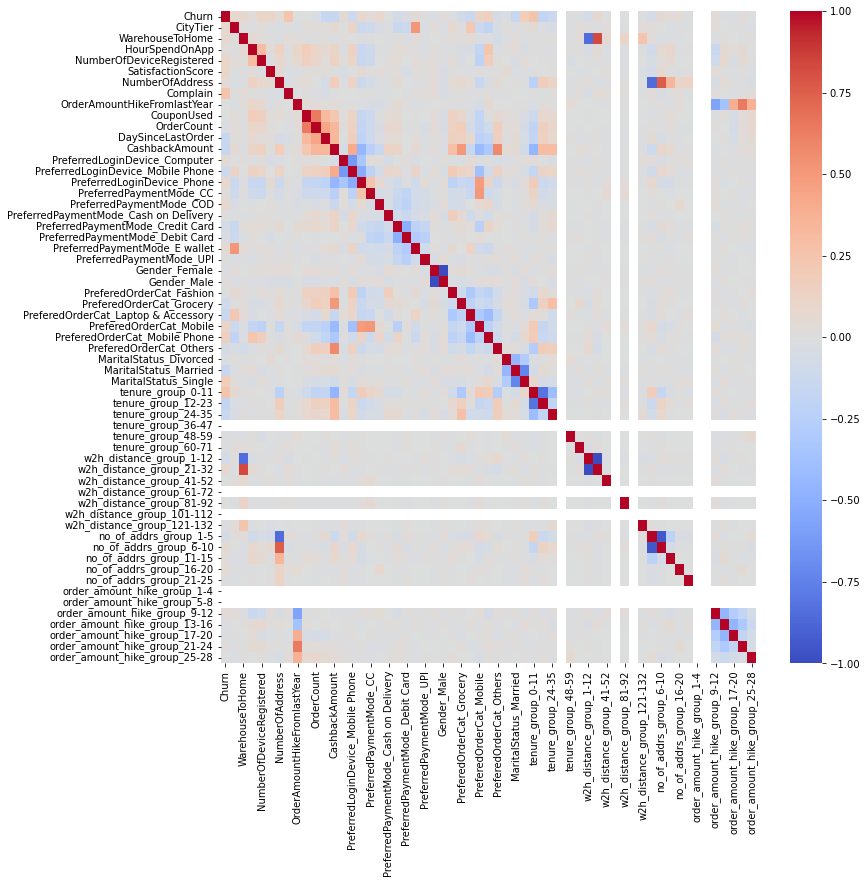

In [58]:
plt.figure(figsize=(12,12))
sns.heatmap(ecdf_dummies.corr(), cmap='coolwarm')

# Bivariate Analysis

In [59]:
ecdf_churn0=ecdf.loc[ecdf['Churn']==0]
ecdf_churn1=ecdf.loc[ecdf['Churn']==1]

In [60]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 18
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 28
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 3*len(temp.unique())
    fig.set_size_inches(width , 5)
    plt.xticks(rotation=40)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [61]:
ecdf_churn1.columns

Index(['Churn', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'tenure_group',
       'w2h_distance_group', 'no_of_addrs_group', 'order_amount_hike_group'],
      dtype='object')

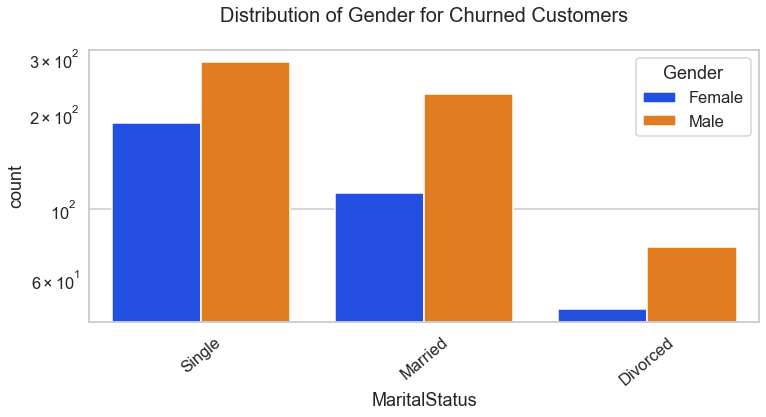

In [62]:
uniplot(ecdf_churn1,col='MaritalStatus',title='Distribution of Gender for Churned Customers',hue='Gender')

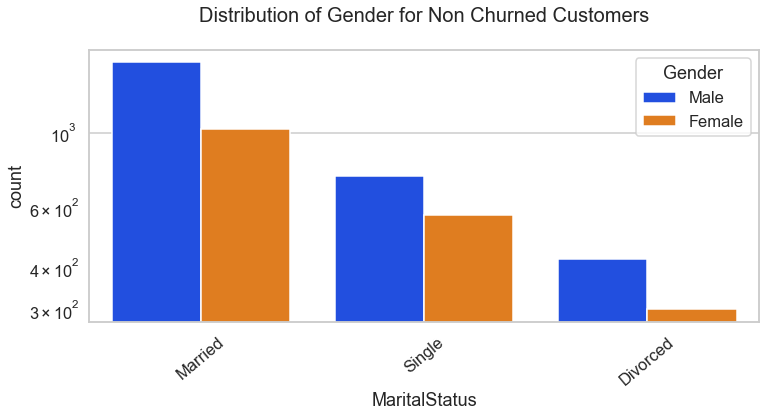

In [63]:
uniplot(ecdf_churn0,col='MaritalStatus',title='Distribution of Gender for Non Churned Customers',hue='Gender')


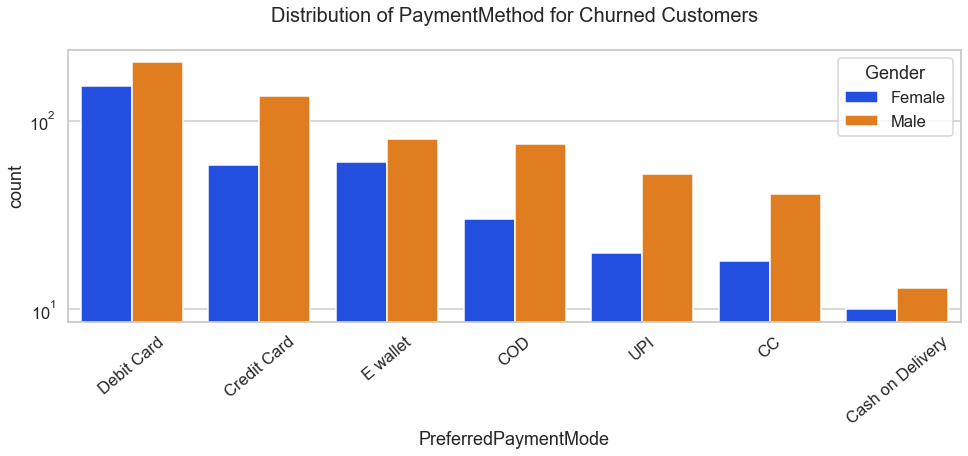

In [64]:
uniplot(ecdf_churn1,col='PreferredPaymentMode',title='Distribution of PaymentMethod for Churned Customers',hue='Gender')


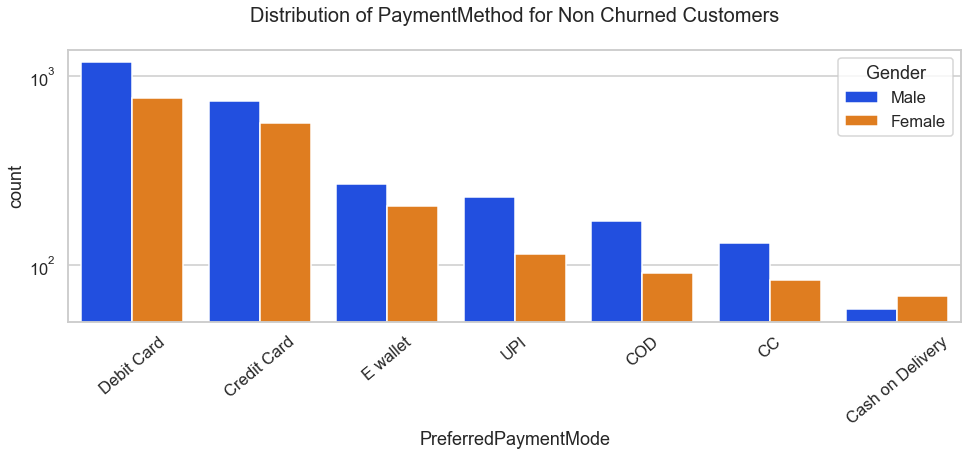

In [65]:
uniplot(ecdf_churn0,col='PreferredPaymentMode',title='Distribution of PaymentMethod for Non Churned Customers',hue='Gender')

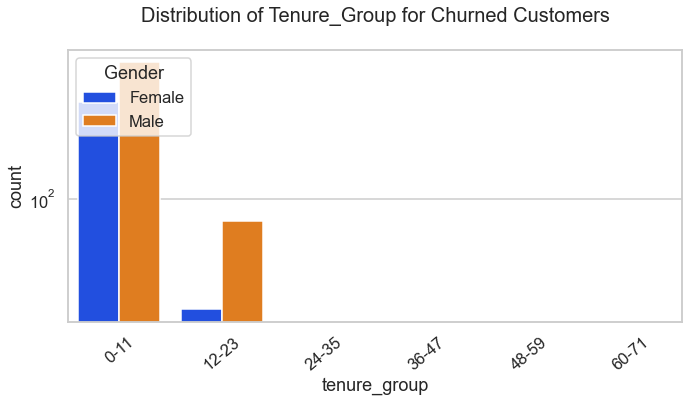

In [66]:
uniplot(ecdf_churn1,col='tenure_group',title='Distribution of Tenure_Group for Churned Customers',hue='Gender')

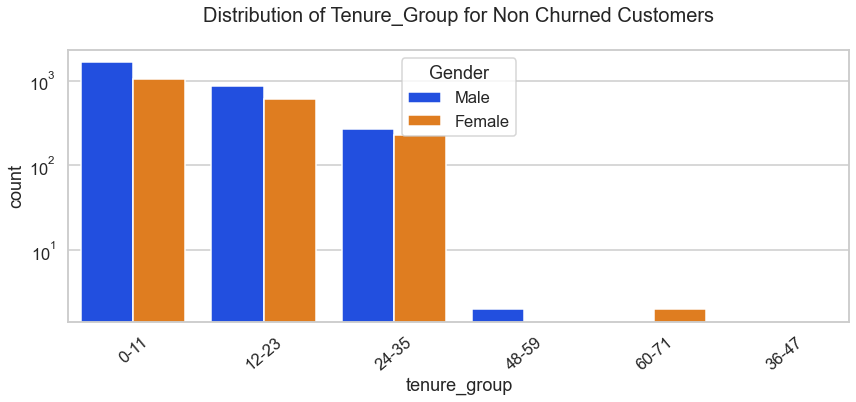

In [67]:
uniplot(ecdf_churn0,col='tenure_group',title='Distribution of Tenure_Group for Non Churned Customers',hue='Gender')

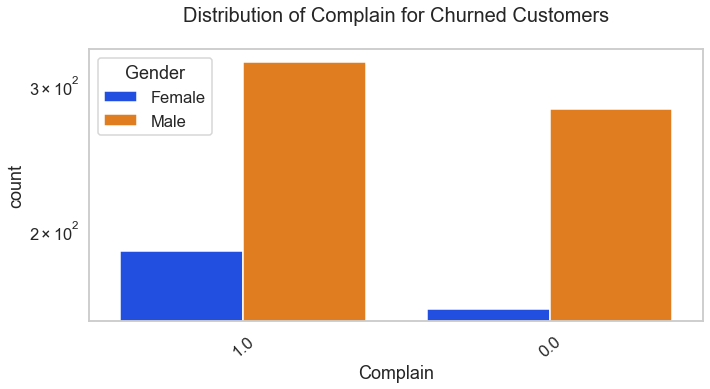

In [68]:
uniplot(ecdf_churn1,col='Complain',title='Distribution of Complain for Churned Customers',hue='Gender')

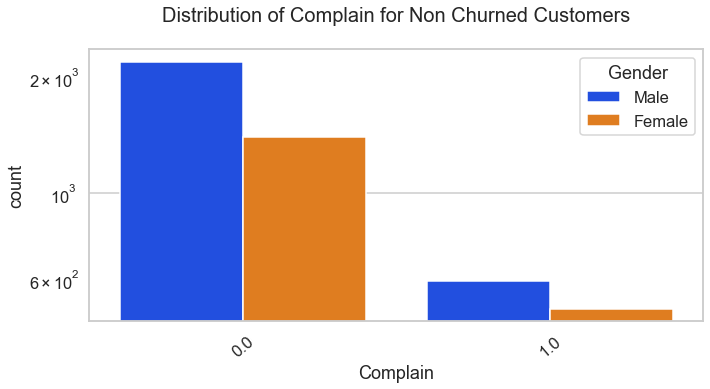

In [69]:
uniplot(ecdf_churn0,col='Complain',title='Distribution of Complain for Non Churned Customers',hue='Gender')

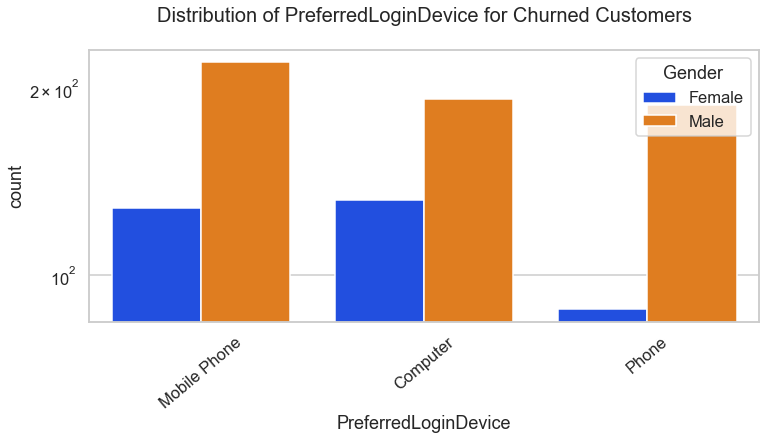

In [70]:
uniplot(ecdf_churn1,col='PreferredLoginDevice',title='Distribution of PreferredLoginDevice for Churned Customers',hue='Gender')

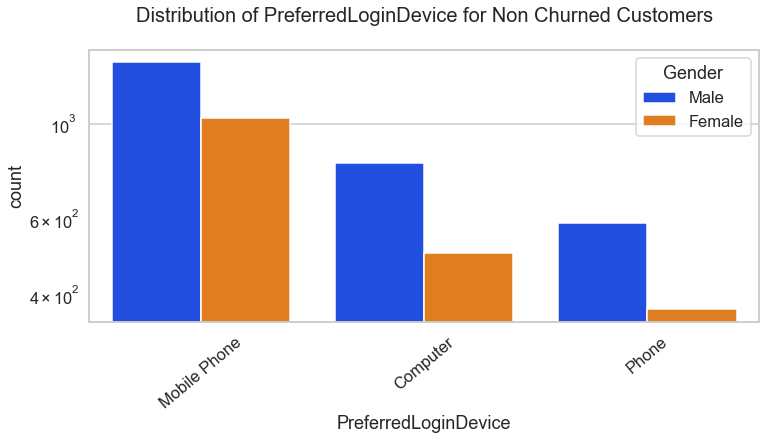

In [71]:
uniplot(ecdf_churn0,col='PreferredLoginDevice',title='Distribution of PreferredLoginDevice for Non Churned Customers',hue='Gender')

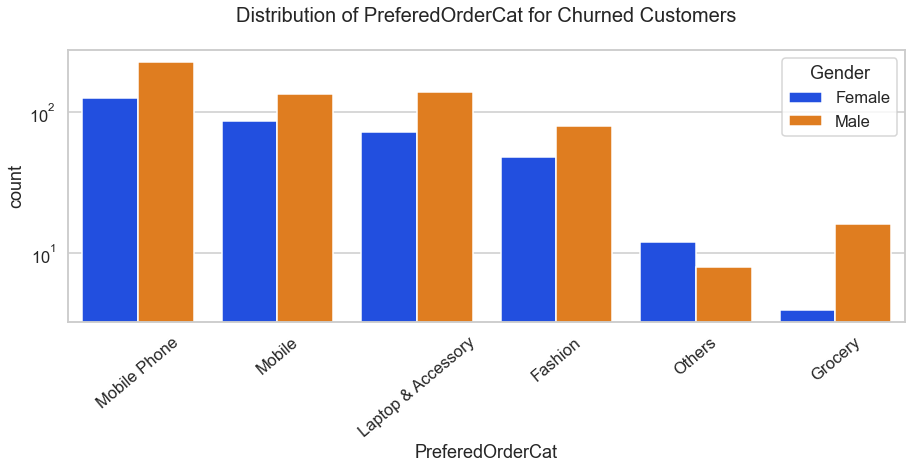

In [72]:
# PreferedOrderCat
uniplot(ecdf_churn1,col='PreferedOrderCat',title='Distribution of PreferedOrderCat for Churned Customers',hue='Gender')

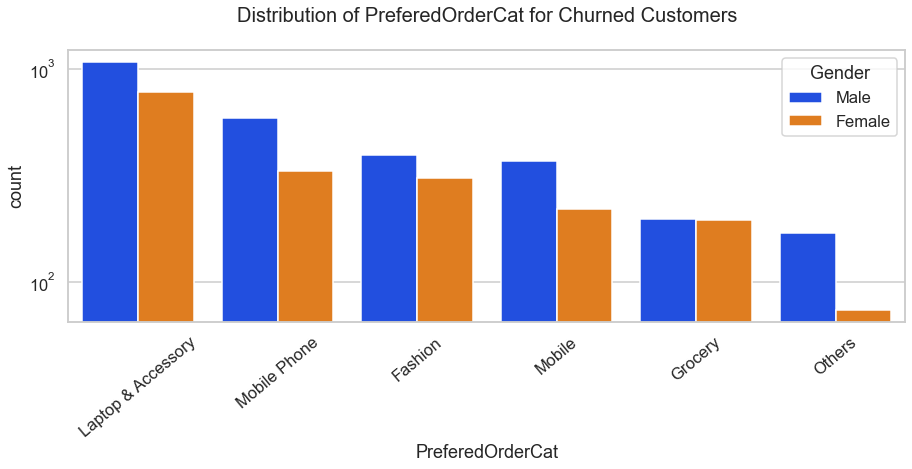

In [73]:
uniplot(ecdf_churn0,col='PreferedOrderCat',title='Distribution of PreferedOrderCat for Churned Customers',hue='Gender')

# Conclusions

1. Married are the most Non-Churned Customers
2. Customers form 1 to 3 year tenure are less likely to churn
3. Most of the customers churned for Mobile as Product_Category
4. we are having most of the sales for electronics(mobiles and laptop&Accessories)
5. Females who have not complained are less likely to churn
6. Males are most likely to churn through (mobile phones and mobile)

there could be many more insights

In [74]:
ecdf_dummies.to_csv('ecdf_dummies.csv')

# Model Building

1. Treating the imbalanced label data with sampling method or smort

# Using SMOTE for balancing the label data

In [75]:
# X_train, y_train = make_imbalance(X_train_1, y_train_1, sampling_strategy={0: 1500, 1: 1500, 2: 1500, 3: 1500},random_state=14)

In [76]:
# smote = SMOTE(random_state = 14)
# X_train_1, y_train_1 = smote.fit_sample(X_train, y_train)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
ecdf.columns

Index(['Churn', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'tenure_group',
       'w2h_distance_group', 'no_of_addrs_group', 'order_amount_hike_group'],
      dtype='object')

In [105]:
X=ecdf_dummies.drop('Churn',axis=1)
y=ecdf_dummies['Churn']

In [83]:
from imblearn.over_sampling import SMOTE

In [84]:
# pip install imblearn

In [109]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,recall_score
from sklearn.tree import DecisionTreeClassifier

# from imblearn import SMOTE

In [106]:
smote = SMOTE()
X_res1, y_res1 = smote.fit_resample(X, y)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [107]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res1, y_res1, test_size=0.30)

# Decision Tree Classifier

its a greedy algorithm

In [108]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [112]:
model_dt_smote.fit(Xr_train,yr_train)
yr_predict = model_dt_smote.predict(Xr_test)
model_score_r = model_dt_smote.score(Xr_test, yr_test)
print('model_score_r : ', model_score_r)
print('\n')
print(metrics.classification_report(yr_test, yr_predict))

model_score_r :  0.8512455516014235


              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1394
         1.0       0.86      0.84      0.85      1416

    accuracy                           0.85      2810
   macro avg       0.85      0.85      0.85      2810
weighted avg       0.85      0.85      0.85      2810



In [111]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[1199  195]
 [ 223 1193]]


# Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [118]:
model_rf_smote.fit(Xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [121]:
yr_predict1 = model_rf_smote.predict(Xr_test)

In [123]:
model_score_r1 = model_rf_smote.score(Xr_test, yr_test)

In [125]:
print('model_score_r1 :' , model_score_r1)
print('\n')
print(metrics.classification_report(yr_test, yr_predict1))

model_score_r1 : 0.8868327402135231


              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1394
         1.0       0.90      0.87      0.89      1416

    accuracy                           0.89      2810
   macro avg       0.89      0.89      0.89      2810
weighted avg       0.89      0.89      0.89      2810



In [126]:
print(metrics.confusion_matrix(yr_test, yr_predict1))

[[1258  136]
 [ 182 1234]]


With RF Classifier, also we are able to get quite good results, infact better than Decision Tree  :)


# Performing PCA

In [128]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
Xr_train_pca = pca.fit_transform(Xr_train)
Xr_test_pca = pca.transform(Xr_test)
explained_variance = pca.explained_variance_ratio_

In [129]:
model_PCA=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [130]:
model_PCA.fit(Xr_train_pca,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [131]:
yr_predict_pca = model_PCA.predict(Xr_test_pca)

In [132]:
model_score_r_pca = model_PCA.score(Xr_test_pca, yr_test)

In [134]:
print('model_score_r_pca : ',model_score_r_pca)
print('\n')
print(metrics.classification_report(yr_test, yr_predict_pca))

model_score_r_pca :  0.6427046263345195


              precision    recall  f1-score   support

         0.0       0.64      0.63      0.64      1394
         1.0       0.64      0.65      0.65      1416

    accuracy                           0.64      2810
   macro avg       0.64      0.64      0.64      2810
weighted avg       0.64      0.64      0.64      2810



With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier :)

# Using XGBoost

In [139]:
pip install xgboost

In [141]:
from xgboost import XGBRegressor

In [142]:
my_model_xgboo = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model_xgboo.fit(Xr_train, yr_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [143]:
# make predictions
predictions = my_model_xgboo.predict(Xr_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, yr_test)))

Mean Absolute Error : 0.1103029895376575


In [147]:
my_model_xgboo_r = my_model_xgboo.score(Xr_test, yr_test)
print('my_model_xgboo_r : ',my_model_xgboo_r)
# print('\n')
# print(metrics.classification_report(yr_test, predictions))

my_model_xgboo_r :  0.8767545283476044


Here also the RF model is working better than the XGBoost so will stick back to the RF model :)

# Future Scope

1. We can look for **KNN**, **Naive Bayes** and **Logistic Regression**
2. We can look for **Cross Validations** to see how our model is perfoming
3. We can use **Stratified y** for futher imporvement in the *Accuracy* of the Model :)

# Suggestions to the Ecommerce Company

1. As High Churn rates have been observed for **Complains,Tenure_Group_0-11,Marital_Status_Single & PreferredOrdCat as Mobile_Phone** so provide them a good services by giving coupons and solutions to their issues so that they would continue their shopping with the company for long period.

2. for Low Churn customers please try to bring some kind of **lucky draw or coupon games** so that they fill it interactive and keep shopping as and when needed.

3. **Try to provide long term subscription services with lots of benefits included along that** as it seen longer tenure customers are less likely to churn. as CouponsUsed is NOT having any relation with the Churn.

:)